# CS-5600/6600 Lecture 5 - Classification

**Instructor: Dylan Zwick**

*Weber State University*

Reference: [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) by Aurélien Géron - [Classification](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as patches  #for the curved arrow

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

<center>
  <img src="https://imgs.xkcd.com/comics/tasks.png" alt="Task from xkcd">
</center>

The [comic above](https://xkcd.com/1425/) is from September, 2014. It's kind of funny because, today, that's a pretty straightforward task. In research, frequently you don't know what's hard and what's easy, and what's hard today could seem easy tomorrow. They say that in the 60s Marvin Minsky had some undergraduate researchers at MIT take pictures of common objects and then try to write a computer program to recognize them. He figured it would be a good summer project. 50 years later, researchers were still working on it.

Today, we're not going to dive into approaches and algorithms that can be used for a classification task like the "bird in the photo" one from the above comic. Instead we're going to step back and examine some basic questions about how we approach classification problems. Specifically:


* How do we define success for a classification algorithm?
* How do we verify if a classification algorithm is successful?
* How do we measure how successful a classification algorithm is?

Now, these questions might at first look obvious. One goal of this lecture is to demonstrate that they are not.

## Classifying Handwritten Digits With The MNIST Dataset

The dataset we'll be using today will be the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database), a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. The original NIST dataset was collected in the 1980s and used to try to tackle an early, non-trivial machine learning problem - [translating handwriting into text](https://youtu.be/FwFduRA_L6Q?si=C2Y45WIFL4zMtFoH). The MNIST ("M" stands for "modified") is based on this original dataset, but with some changes.

This problem and dataset has been studied so much, it's often called the ["hello world"](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) of machine learning. The Scikit-Learn (sklearn) library makes many popular learning datasets available through its [sklearn.datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html) package, and provides helper functions to download them. Some of [these datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) are so small they're just included with sklearn, and can be accessed with "load" functions. Others (like MNIST) must be downloaded online, and are accessed by "fetch" functions. There are also "make" functions that are used to generate synthetic (or "fake") datasets.

Let's grab the MNIST dataset.

In [3]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto') #We set as_frame=False because we want these as NumPy arrays, not as Pandas dataframes.

These datasets generally contain a description (DESCR) entry that describes what they are and where they came from. For example:

In [4]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

These datasets are usually returned as an (X,y) tuple containing the input data and a bunch of targets. We'll set these equal to, respectively, X and y.

In [5]:
X, y = mnist.data, mnist.target

Let's take a look at the data:

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

There are 70,000 images, and each image has 784 features. Why? Because each image is a 28 x 28 (which equals 784) grid, and each feature represents one pixel's intensity, ranging from 0 for white to 255 for black.

In [7]:
X.shape

(70000, 784)

The y values are the target digits - numbers from 0 to 9.

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y.shape

(70000,)

We can take a look at one of these digits by first reshaping the NumPy array, and then displaying it using Matplotlib's [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function. We set cmap="binary" to get a grayscale color map.

In [10]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary") #Setting the color map (cmap) to "binary" produces a greyscale color map where 0 is white and 255 is black
  plt.axis("off")

We'll grab the first digit and check out its values.

In [11]:
some_digit = X[0]
some_digit

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

This is how those values look as a grayscale image.

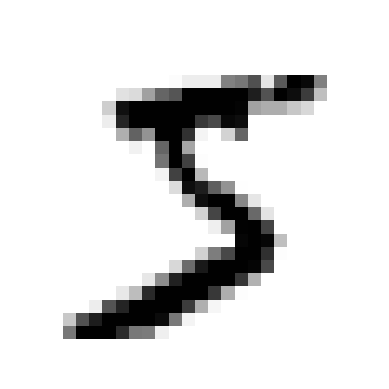

In [12]:
plot_digit(some_digit)
plt.show()

This looks like a 5, and indeed it is.

In [13]:
y[0]

'5'

If we want to check out some more figures, we can with the code below. (Don't worry about the specifics of how this code works, it's not necessary for understanding the material from this lecture.)

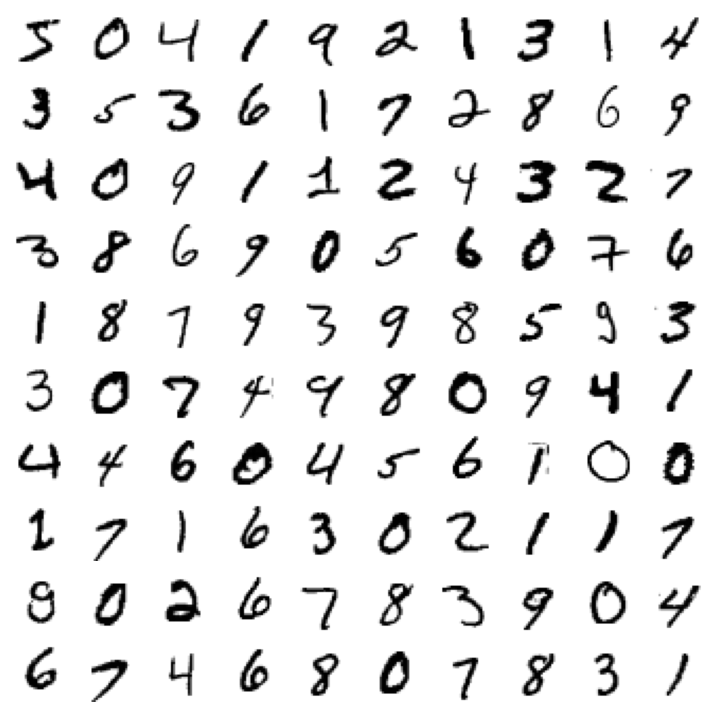

In [14]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.show()

## A Binary Classifier

Today we won't try to classify all the digits - that comes later. Instead, we'll focus on an easier task: *5 or not*. Specifically, we want to build a classifier that will discriminate the 5s from the other digits. Pretty straightforward.

Before we go further, let's split the data into a training dataset and a test dataset.

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Now, let's create a new array whose entries aren't numbers, but are just Booleans indicating whether the corresponding image is a 5 or not.

In [16]:
y_train_5 = (y_train == '5') #This creates an array that is True for all 5s, and False for all other digits
y_test_5 = (y_test =='5')
y_train_5

array([ True, False, False, ...,  True, False, False])

Now, we're going to use a linear classifier, called a *stochastic gradient descent* classifier, which we can find in sklearn's [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) class. We'll learn more about linear classifiers and stochastic gradient descend later, but for now just understand that it's a model that we can train to make binary classifications.

In [17]:
sgd_clf = SGDClassifier(random_state = 42) #Setting the random state insures we get the same "random" behavior every time. Why 42? IYKYK

We've now created a stochastic gradient descent classifier object. We now want to train this object on our data.

In [18]:
sgd_clf.fit(X_train, y_train_5) #This may take a minute.

SGDClassifier(random_state=42)

Now that we've trained our model, we can check how well it does on our first digit (which, recall, is in fact a 5). We can do so with the predict method in the classifier class.

In [19]:
sgd_clf.predict([some_digit])

array([ True])

Nailed it!

## Measuring Success for a Classification Algorithm

How do we tell if our classification algorithm is successful? One of the more straightforward ways we could attempt to measure this is with its accuracy - the percentage of cases where it makes the right call. Let's do that for our test data. First, we generate the array of our predictions:

In [20]:
y_pred_5 = sgd_clf.predict(X_test)

Next, we'll check the accuracy:

In [21]:
accuracy = accuracy_score(y_test_5,y_pred_5)
accuracy

0.9492

That's pretty good! However, this can be deceptive. Our dataset isn't one where half of the cases are 5s, and half are not. In fact, if you were to just guess the most common value using a ["dummy classifier"](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) we'd get an accuracy close to 90%.

In [22]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5);

In [23]:
y_pred_5_dummy = dummy_clf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test_5,y_pred_5_dummy)
accuracy

0.9108

So, 94.9% is better than the dummy, but it's maybe not all *that* much better. This is one reason why accuracy might not generally be the best performance measure, particularly when there are "skewed" datasets (datasets where some target classes are much more common than others).

A way of looking at the performance that provides us much more information than just the accuracy is through a *confusion matrix*.

###Confusion Matrix

<center>
  <img src="https://drive.google.com/uc?export=view&id=1lC5P5HjgkH4JFUAuckPSXN0u-yN7R1xx" alt="Confusion Matrix">
</center>

The idea behind a confusion matrix is there are two types of errors:


*   **False Positive** - When you predict something is true, and it's actually false. (Also called Type I errors.)
*   **False Negative** - When you predict something is false, and it's actually true. (Also called Type II errors.)

An accuracy score treats false positives and false negatives the same. Usually, they're not.

For example, suppose you were working on a bomb detection system for airport security. A false positive might lead to a bit more investigation. A false negative might lead to a bomb on a plane. Pretty big difference!

Now, you might think what you should try to do in a good model is minimize both, which would be nice. However, generally speaking that's impossible, as decreasing one tends to increase the other. At the extremes, if you reject everything (say everything is false) then you'll never have a false positive, but you'll maximize the false negatives. If, on the other hand, you accept everything (say everything is true) then you'll never have a false negative, but you'll maximize the false positives.

Figuring out the optimal balance is partly a math problem and partly a judgement call, and it usually depends on the relative costs (or penalties) of getting them wrong.

The idea behind a confusion matrix is that each row represents the actual value, and each column represents the predicted value. So, the numbers along the diagonal are the correct predictions (the true positives and true negatives), while the numbers off the diagonal are the incorrect predictions. Let's take a look at the confusion matrix for our SGD classifier on the *5 or not* problem. First, we'll form a vector of our predictions.

In [25]:
y_train_pred = sgd_clf.predict(X_train)

Next, we'll compare our vector of predictions against the vector of actual values with the [*confusion_matrix*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#confusion-matrix) function.

In [26]:
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[52316,  2263],
       [  601,  4820]])

Please note the first row and column here represents FALSE, while the second row and column represent TRUE, which is the reverse of the image above. Sorry.

Note the first row / column represents negative (false), while the second represents positive (true). So, there are 53,892 instances where the digit was not a 5 and the model predicted it was not (true negatives), 687 instances where the digit was a 5 and the model predicted it was not (false positives), 1,891 instances where the digit was a 5 and the model predicted it was not (false negatives), and 3530 times where the digit was a 5 and the model predicted it was (true positives).

If we had a perfect model, there would be no entries off the diagonal, and our  confusion matrix would look like:

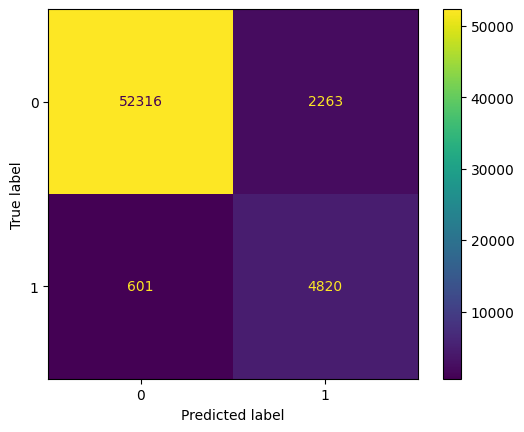

In [27]:
y_train_perfect_predictions = y_train_5 #Pretend we have a perfect predictor - sometimes called an "oracle".
from sklearn.metrics import auc, RocCurveDisplay, roc_curve, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


However, in the real world, we'll never have a perfect model. So, for an imperfect model, there are a few measures of success that we can use.

The first, *precision*, measures how frequently the model is correct when it predicts a positive:

<center>
$\displaystyle \text{Precision} = \frac{TP}{TP + FP}$
</center>


*   TP = "True Positive"
*   FP = "False Positive"

For our 5 or not model, the [precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#precision-score) is:

In [28]:
precision_score(y_train_5, y_train_pred) # = 4820 / (4820+2263)

0.6805026118876183

OK. So, when the model predicts an image is a 5, it's right about 68% of the time. Is that good? Well, it's a lot better than random guessing, but a lot worse than a person.

There are other metrics we can use to measure success, like *recall*. Recall measures the percentage of actual positives the model identified:

<center>
$\displaystyle \text{Recall} = \frac{TP}{TP + FN}$
</center>



*   FN = "False Negative"

For our 5 or not model, the [recall score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#recall-score) is:


In [29]:
recall_score(y_train_5, y_train_pred) # == 4820 / (4820 + 601)

0.8891348459693783

So, of the actual images of 5s, the model correctly identified about 89%. Again, much better than random guessing, but really not that good, and certainly *much* worse than a person.

## The Precision-Recall Tradeoff

Generally speaking, improving precision comes at the price of reducing recall, and vice versa. The precise relation depends on the model, and (for a given dataset) can be plotted and explored.

Under the hood, what every binary classification model does is produce a number - or score - that correlates with whether the input is thought to be positive or negative (true or false). A higher score means it's more likely to be positive, a lower score means it's more likely to be negative. Sometimes this score is or can be interpreted as a probability, but not always. The classification decision is made by whether this score is above a given threshold.

For our SGD classifier, this score is the output of its "decision function", and we can access the value of this function using the [*decision_function*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function) method. For example:

In [30]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

By default, the threshold value for this decision function is $0$. For this threshold, we see it predicts that the first digit is a 5, which indeed it is.

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

However, we could set the threshold to be something else, and then make our predictions based on this different threshold. If we set the threshold to be, say, 3000, then the first digit wouldn't make the cut:

In [32]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Generally speaking, the higher the threshold, the more certain the model must be before it makes a positive prediction. Having a high threshold tends to decrease the number of false positives, and this increases precision. However, it also tends to increase the number of false negatives, which decreases recall. We can graph this relation with the [*precision_recall_curve*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#precision-recall-curve) function from the metrics library in sklearn.

First, let's calculate the scores using cross validation and our SGD classifier.

In [33]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

We can use this vector of scores, along with the vector of actual values, to get the precision and recall numbers for various thresholds. Note that, for a given model and dataset, the precision and recall values are functions of the threshold.

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

We can then use these precision, recall, and threshold values to chart how both precision and recall change with different threshold values.

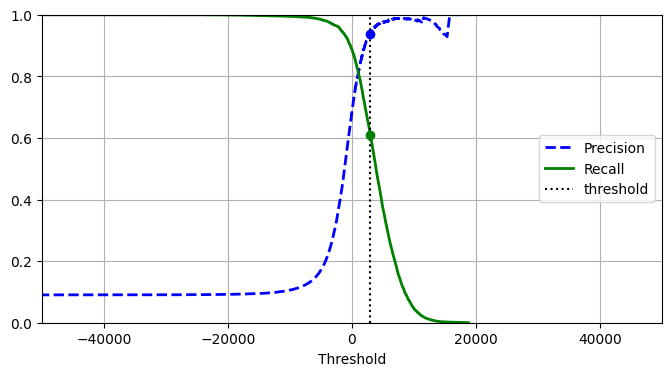

In [35]:
plt.figure(figsize=(8, 4))  # Formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

The dotted vertical line represents the threshold of 3000. Note also that the precision value tends to wobble a bit at very high thresholds due to the small number of positive predictions and the high variability of the precision to these predictions dropping out.

We could also graph the precision value on the vertial axis and the recall on the horizontal, and create a curve parametrized by the threshold. Doing so gives us a curve like the one below, which allows us to more directly determine how precision changes as a function of recall.

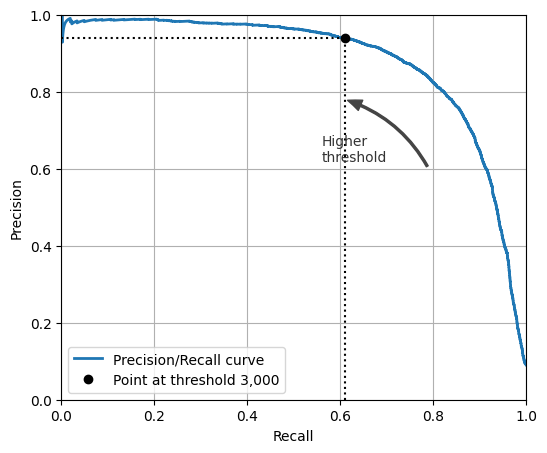

In [36]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

Suppose we wanted our precision to be 90%. What is the corresponding threshold? Well, we could attempt to eyeball it from the chart above, but if we want to be precise (we are concerned about precision, after all) we can derive it from our precision and threshold vectors:

In [37]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

2123.5620469950154

In [38]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000705384434516

So what's the recall score if we have 90% precision?

In [39]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.7061427780852241

So, at 90% precision, we have a recall below 50%. In other words, if we want to make sure that when the model says it's a 5 then it's right 90% of the time, we have to live with it failing to identify a majority of the 5s. Is that OK? Well, for most applications, probably not.

## The ROC Curve

Optimizing precision or recall on their own won't be a good strategy for building a model. Is there a way that both could be combined in a sensible manner that could be optimized?

Well, one way to do this is with something called the $F_{1}$ score, which takes what's called the [*harmonic mean*](https://en.wikipedia.org/wiki/Harmonic_mean) of the precision and recall:

<center>
$\displaystyle F_{1} = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$
</center>

Calculating this for our SGD classifier we get:

In [40]:
f1_score(y_train_5, y_train_pred)

0.7709532949456175

Note the $F_{1}$ score favors classifiers that have similar precision and recall, which isn't always what we want.

Another overall measure is derived from the ROC (receiver operating characteristic) curve. The ROC curve is very similar to the precision/recall curve, but instead of plotting the precision against the recall, it plots the recall (also known as the true positive rate) against the fall-out (also known as the false positive rate).
<center>
$\displaystyle \text{Fall-Out} = \frac{FP}{FP + TN}$
</center>

* TN = "True Negative"

We can plot the ROC curve using the [*roc_curve*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#roc-curve) function:

In [41]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Plotting this we get:

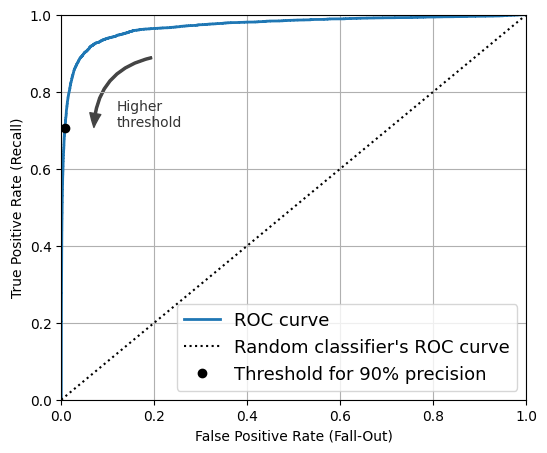

In [42]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # Formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# Adds style
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

The way we can use the ROC curve to get a measure of the model quality is by calculating the area underneath it. The AUC (area under the curve) will be equal to 1 for a perfect classifier, and equal to .5 for a random classifier.

Sklearn provides a function, [*roc_auc_score*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#roc-auc-score), for calculating it. Using this function on our SGD classifier, we get a score of:

In [43]:
roc_auc_score(y_train_5, y_scores)

0.9709618248430906

Since the ROC curve is so similar to the precision/recall (PR) curve, you might wonder how to decide which one to use. Generally speaking, you should prefer the PR curve whenever the positive class is rare, or when you care more about the false positives than the false negatives. Otherwise, use the ROC curve.

For our problem, the PR curve would probably be better.

### Homework

You'll be working on a homework assignment to classify a bunch of images of animals based on whether or not they are an alpaca, and creating these curves for yourself.

### References


*   [MNIST Dataset](https://youtu.be/5gLarqG8p4s?si=SfEM5cwvTVsH9CYw)
*   [ROC and AUC](https://youtu.be/4jRBRDbJemM?si=TX0UAv7_wiVoxz28)

* Song of the Day - [Should I Stay or Should I Go?](https://www.youtube.com/watch?v=BN1WwnEDWAM) by The Clash